In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
import glob
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
from scipy.signal import savgol_filter

from plotting import load_data
from plotting import plot_scalar
from plotting import print_infos


### Plot Settings

is already specified in plotting.py, but can be overwritten here

In [5]:
plt.rcParams["figure.figsize"] = (16,9)

In [6]:
# see available styles
# print(plt.style.available)

In [7]:
plt.style.use('ggplot')

### Plotting

In [10]:
# load data
data = load_data(14, load_histos=False)

W0701 23:17:32.637000 139739129505600 deprecation_wrapper.py:118] From /home/kaijeggle/dev/Uni/rL_project/Wizard/tests/plotting/plotting.py:40: The name tf.train.summary_iterator is deprecated. Please use tf.compat.v1.train.summary_iterator instead.

W0701 23:17:32.637562 139739129505600 deprecation.py:323] From /home/kaijeggle/dev/Uni/rL_project/wizard_python/lib/python3.6/site-packages/tensorflow/python/summary/summary_iterator.py:68: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [12]:
print_infos(data)

##### Agents #####
RuleBasedAgent
RuleBasedAgentPredictor
TFAgentsPPOAgentClone1
TFAgentsPPOAgent


##### Summaries #####


### RuleBasedAgent ###


## scalars ##


1_win_percentage (82 time steps)
2_score (82 time steps)


### RuleBasedAgentPredictor ###


## scalars ##


1_win_percentage (82 time steps)
2_score (82 time steps)
5_predictor_loss (71 time steps)
3_predictor_acc (71 time steps)
6_prediction_differences (82 time steps)
4_predictor_acc_real (82 time steps)
7_overall_mean_predictions_0 (82 time steps)
8_correct_mean_predictions_0 (81 time steps)
9_incorrect_mean_predictions_0 (82 time steps)
7_overall_mean_predictions_1 (82 time steps)
8_correct_mean_predictions_1 (75 time steps)
9_incorrect_mean_predictions_1 (81 time steps)
7_overall_mean_predictions_2 (82 time steps)
8_correct_mean_predictions_2 (76 time steps)
9_incorrect_mean_predictions_2 (82 time steps)
7_overall_mean_predictions_3 (82 time steps)
8_correct_mean_predictions_3 (76 time steps)
9_incorrect_mean_predicti

Agents that have data for metric `2_score`:  ['RuleBasedAgent', 'RuleBasedAgentPredictor', 'TFAgentsPPOAgentClone1', 'TFAgentsPPOAgent']


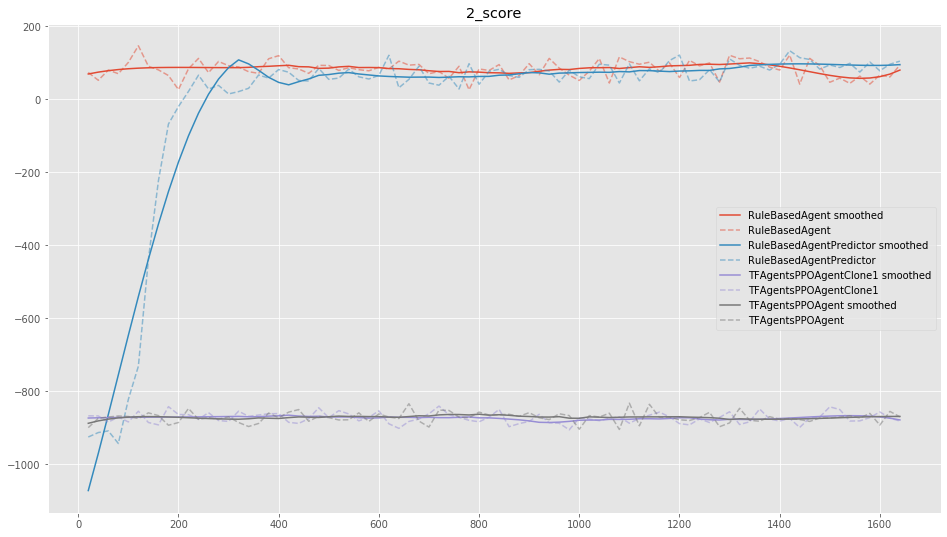

In [15]:
plot_scalar(data, summary_name='2_score',smoothing=True)